# Linear Regression with TensorFlow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def generate_dataset():
    x_batch = np.linspace(0, 2, 100)
    y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
    return x_batch, y_batch

In [3]:
x_batch, y_batch = generate_dataset()

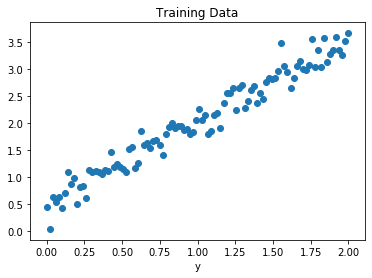

In [4]:
plt.scatter(x_batch, y_batch) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show()

In [5]:
print(x_batch.shape)
print(type(x_batch.shape))

(100,)
<class 'tuple'>


In [6]:
np.random.randn(*(2,))

array([-1.68959844,  0.09208835])

In [7]:
np.random.randn(2)

array([0.26175983, 0.52188755])

In [8]:
x = tf.placeholder(tf.float32, shape=(None, ), name='x')
y = tf.placeholder(tf.float32, shape=(None, ), name='y')
x

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [13]:
x = tf.placeholder(tf.float32, shape=(None, ), name='x')
y = tf.placeholder(tf.float32, shape=(None, ), name='y')
x

<tf.Tensor 'x_1:0' shape=(?,) dtype=float32>

In [14]:
def linear_regression():
    x = tf.placeholder(tf.float32, shape=(None, ), name='x')
    y = tf.placeholder(tf.float32, shape=(None, ), name='y')

    with tf.variable_scope('lreg') as scope:
        w = tf.Variable(np.random.normal(), name='W')
        b = tf.Variable(np.random.normal(), name='b')
    
        y_pred = tf.add(tf.multiply(w, x), b)

        loss = tf.reduce_mean(tf.square(y_pred - y))

    return x, y, y_pred, loss

In [15]:
x_batch, y_batch   = generate_dataset()
x, y, y_pred, loss = linear_regression()

optimizer = tf.train.GradientDescentOptimizer(0.1)
train_op = optimizer.minimize(loss)

In [17]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x: x_batch, y: y_batch}      
    
    for i in range(30):
        session.run(train_op, feed_dict)
        print(i, "loss:", loss.eval(feed_dict))
    
    print('Predicting')
    y_pred_batch = session.run(y_pred, {x : x_batch})

0 loss: 1.6225443
1 loss: 0.9219785
2 loss: 0.67706144
3 loss: 0.5780296
4 loss: 0.52656865
5 loss: 0.4914225
6 loss: 0.462604
7 loss: 0.43687537
8 loss: 0.41314375
9 loss: 0.39099997
10 loss: 0.37025592
11 loss: 0.35079685
12 loss: 0.33253497
13 loss: 0.31539395
14 loss: 0.29930416
15 loss: 0.2842008
16 loss: 0.27002338
17 loss: 0.25671512
18 loss: 0.2442227
19 loss: 0.23249607
20 loss: 0.22148836
21 loss: 0.21115543
22 loss: 0.20145595
23 loss: 0.19235106
24 loss: 0.18380432
25 loss: 0.17578153
26 loss: 0.16825056
27 loss: 0.16118126
28 loss: 0.15454532
29 loss: 0.14831617
Predicting


In [18]:
y_pred_batch

array([1.1177311, 1.1372818, 1.1568326, 1.1763833, 1.1959339, 1.2154847,
       1.2350354, 1.2545861, 1.2741369, 1.2936876, 1.3132384, 1.3327891,
       1.3523397, 1.3718905, 1.3914412, 1.4109919, 1.4305427, 1.4500934,
       1.4696441, 1.4891949, 1.5087456, 1.5282962, 1.547847 , 1.5673977,
       1.5869484, 1.6064992, 1.6260499, 1.6456006, 1.6651514, 1.684702 ,
       1.7042528, 1.7238035, 1.7433543, 1.762905 , 1.7824557, 1.8020065,
       1.8215572, 1.8411078, 1.8606586, 1.8802093, 1.89976  , 1.9193108,
       1.9388615, 1.9584122, 1.977963 , 1.9975137, 2.0170643, 2.0366151,
       2.0561657, 2.0757165, 2.0952673, 2.114818 , 2.1343687, 2.1539195,
       2.17347  , 2.1930208, 2.2125716, 2.2321224, 2.251673 , 2.2712238,
       2.2907746, 2.3103251, 2.329876 , 2.3494267, 2.3689775, 2.388528 ,
       2.408079 , 2.4276295, 2.4471803, 2.466731 , 2.4862819, 2.5058324,
       2.5253832, 2.5449338, 2.5644846, 2.5840354, 2.6035862, 2.6231368,
       2.6426876, 2.6622381, 2.681789 , 2.7013397, 

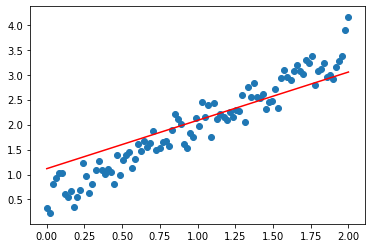

In [20]:
plt.scatter(x_batch, y_batch)
plt.plot(x_batch, y_pred_batch, color='red')
#plt.xlim(0, 2)
#plt.ylim(0, 2)
plt.savefig('plot.png')